In [1]:
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as s
#from statsmodels.formula.api import ols

In [2]:
tb1 = pd.read_excel('C:/Users/himanshu ranjan/Downloads/dummy.xlsx')

In [3]:
tb1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'simple linear regression')

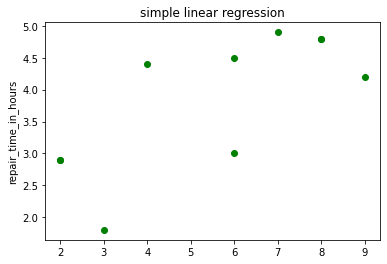

In [4]:
plt.scatter(tb1['months_since_last_service'], tb1['repair_time_in_hours'], color = "green")
plt.ylabel('repair_time_in_hours')
plt.title('simple linear regression')

In [5]:
from statsmodels.formula.api import ols
Reg = ols(formula="repair_time_in_hours ~ months_since_last_service", data=tb1)
Fit1 = Reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Mon, 21 Mar 2022   Prob (F-statistic):             0.0163
Time:                          05:35:53   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

C:\Users\himanshu ranjan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


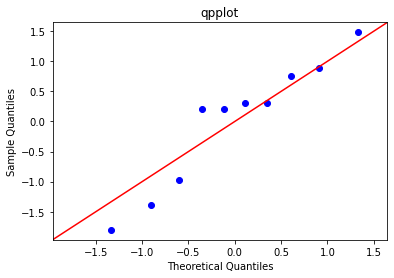

In [7]:
#mormal probability residual plot
res = Fit1.resid
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qpplot')
plt.show()


In [8]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [9]:
step_1 = pd.concat([tb1, just_dummies], axis=1)
step_1
step_1.drop(['type_of_repair', 'mechanical'], inplace=True, axis=1)

In [10]:
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [17]:
result = sm.ols(step_1['repair_time_in_hours'], s.add_constant(step_1[['months_since_last_service', 'electrical']])).fit()
print(result.summary())

PatsyError: model is missing required outcome variables

In [18]:
#Example 2
tb2 = pd.read_excel('C:/Users/himanshu ranjan/Downloads/dummy2.xlsx')

In [19]:
tb2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple linear Regression')

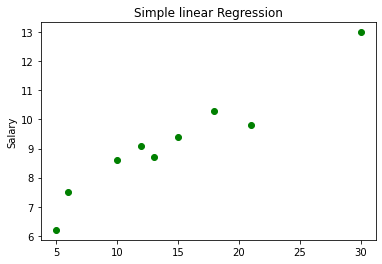

In [20]:
#finding the trend
plt.scatter(tb2['Experience'],tb2['Salary'], color = "green")
plt.ylabel('Salary')
plt.title('Simple linear Regression')

In [21]:
#seems to be a posetive trend
Reg2 = ols(formula = "Salary ~ Experience", data = tb2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           3.30e-05
Time:                        05:44:03   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

C:\Users\himanshu ranjan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
#residual analysis
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external


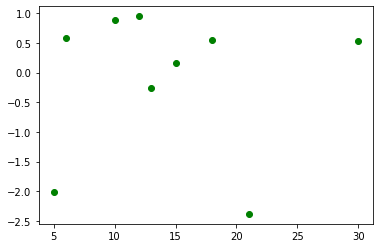

In [23]:
plt.figure()
plt.scatter(tb2['Experience'],resid_student, color ="green")

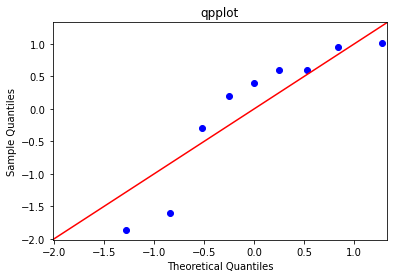

In [24]:
#it does not show a good trend as most of the points are above the reference 0.0
#mormal probability residual plot
res = Fit2.resid
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qpplot')
plt.show()
